In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mikeio

source: https://dhi.github.io/getting-started-with-mikeio/dfs2.html

本节主要内容对dfs2文件进行数据处理，包括：
1. 读取，并查看--类型、shape、geometry
2. 按数据名称选取
3. 按位置选取
4. slicing
5. 写入dfs2
6. 坐标系系统的设置

In [24]:
ds = mikeio.read("mini_book\data\gebco_sound.dfs2")
ds

<mikeio.Dataset>
Dimensions: (1, 264, 216)
Time: 2020-05-15 11:04:52 - 2020-05-15 11:04:52
Items:
  0:  Elevation <Total Water Depth> (meter)

In [25]:
type(ds)

mikeio.dataset.Dataset

In [26]:
ds.shape

(1, 264, 216)

In [27]:
elevation = ds[0]

C:\Users\jiyu\Anaconda3\lib\site-packages\mikeio\dataset.py:258: UserWarning: Indexing in MIKE IO 1.0 will not return a numpy array, but a mikeio.DataArray. More info: https://github.com/DHI/mikeio#readme
  warnings.warn(


In [28]:
type(ds[0]) # in the updated mikeio 1.0, it will show 'mikeio.dataarray.DataArray'

numpy.ndarray

In [29]:
type(elevation)

numpy.ndarray

In [30]:
elevation.shape

(1, 264, 216)

In [31]:
elevation.plot() # update mikeio to the version of 1.0 

AttributeError: 'numpy.ndarray' object has no attribute 'plot'

# Spatial axes 

In [18]:
ds.geometry # update mikeio

AttributeError: 'Dataset' object has no attribute 'geometry'

# Extract data at location 

In [32]:
stn = 12.74792, 55.865
da_stn = elevation.interp(x=stn[0], y=stn[1])
da_stn

AttributeError: 'numpy.ndarray' object has no attribute 'interp'

In [ ]:
da_stn.values

In [ ]:
elevation.plot()
plt.scatter(stn[0],stn[1],marker='*',s=500,c='black')
plt.text(12.85, 56.0, "Sweden")
plt.text(12.3, 55.8, "Denmark")

# slicing 

In [ ]:
elevation.plot()
plt.axvline(stn[0])
plt.axhline(stn[1])

In [ ]:
elevation.sel(y=stn[1]).plot(title="West-East");

In [ ]:
elevation.sel(x=stn[0]).plot(title="South-North");

# Writing data 

In [33]:
data_i = np.arange(24).reshape(2,4,3)
data_i.shape

(2, 4, 3)

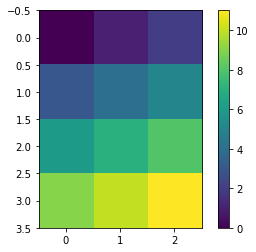

In [34]:
plt.imshow(data_i[0]) #first timestamp
plt.colorbar()

In [35]:
grid = mikeio.Grid2D(x0=12.0, dx=1.0, y0=55.0, dy=1.0, nx=3, ny=4, projection='LONG/LAT')
grid # 设置坐标系，坐标起始点，精度，范围

AttributeError: module 'mikeio' has no attribute 'Grid2D'

In [ ]:
nt = data_i.shape[0]

da = mikeio.DataArray(data = data_i,
                      geometry=grid,
                      time = pd.date_range("2020",periods=nt,freq='D'),
                      item= mikeio.ItemInfo("Example", mikeio.EUMType.Elevation))

da

In [ ]:
ds = mikeio.Dataset([da])
ds

In [ ]:
ds.to_dfs('example_geo.dfs2')

# Projected coordinates 
Projection string in WKT format. Use MIKE Zero for formatting. Some shorthands are available for UTM zones, e.g. UTM-32.

In [ ]:
pgrid = mikeio.Grid2D(x0 = 337100.0, dx= 10000.0, y0= 6122900.0, dy=10000.0, nx=3, ny=4, projection="UTM-32")
pgrid

In [ ]:
pda = mikeio.DataArray(data = data_i,
                       geometry=pgrid,
                       time = pd.date_range("2020",periods=nt,freq='D'),
                       item= mikeio.ItemInfo("Example", mikeio.EUMType.Elevation))

pda

In [ ]:
pda.plot()

In [ ]:
pda.to_dfs("example_proj.dfs2")